In [1]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft,fft2,ifft, fftshift, hfft
import matplotlib.pyplot as plt
import skimage
from skimage import io
import math

In [19]:
#Leer una imagen
Im = io.imread('moon.png')

C:\Users\ACER\AppData\Local\Temp\ipykernel_12360\2357261154.py:43: RuntimeWarning: divide by zero encountered in log
  axes[1,1].imshow(np.log(abs(tfa1f)), cmap='gray')


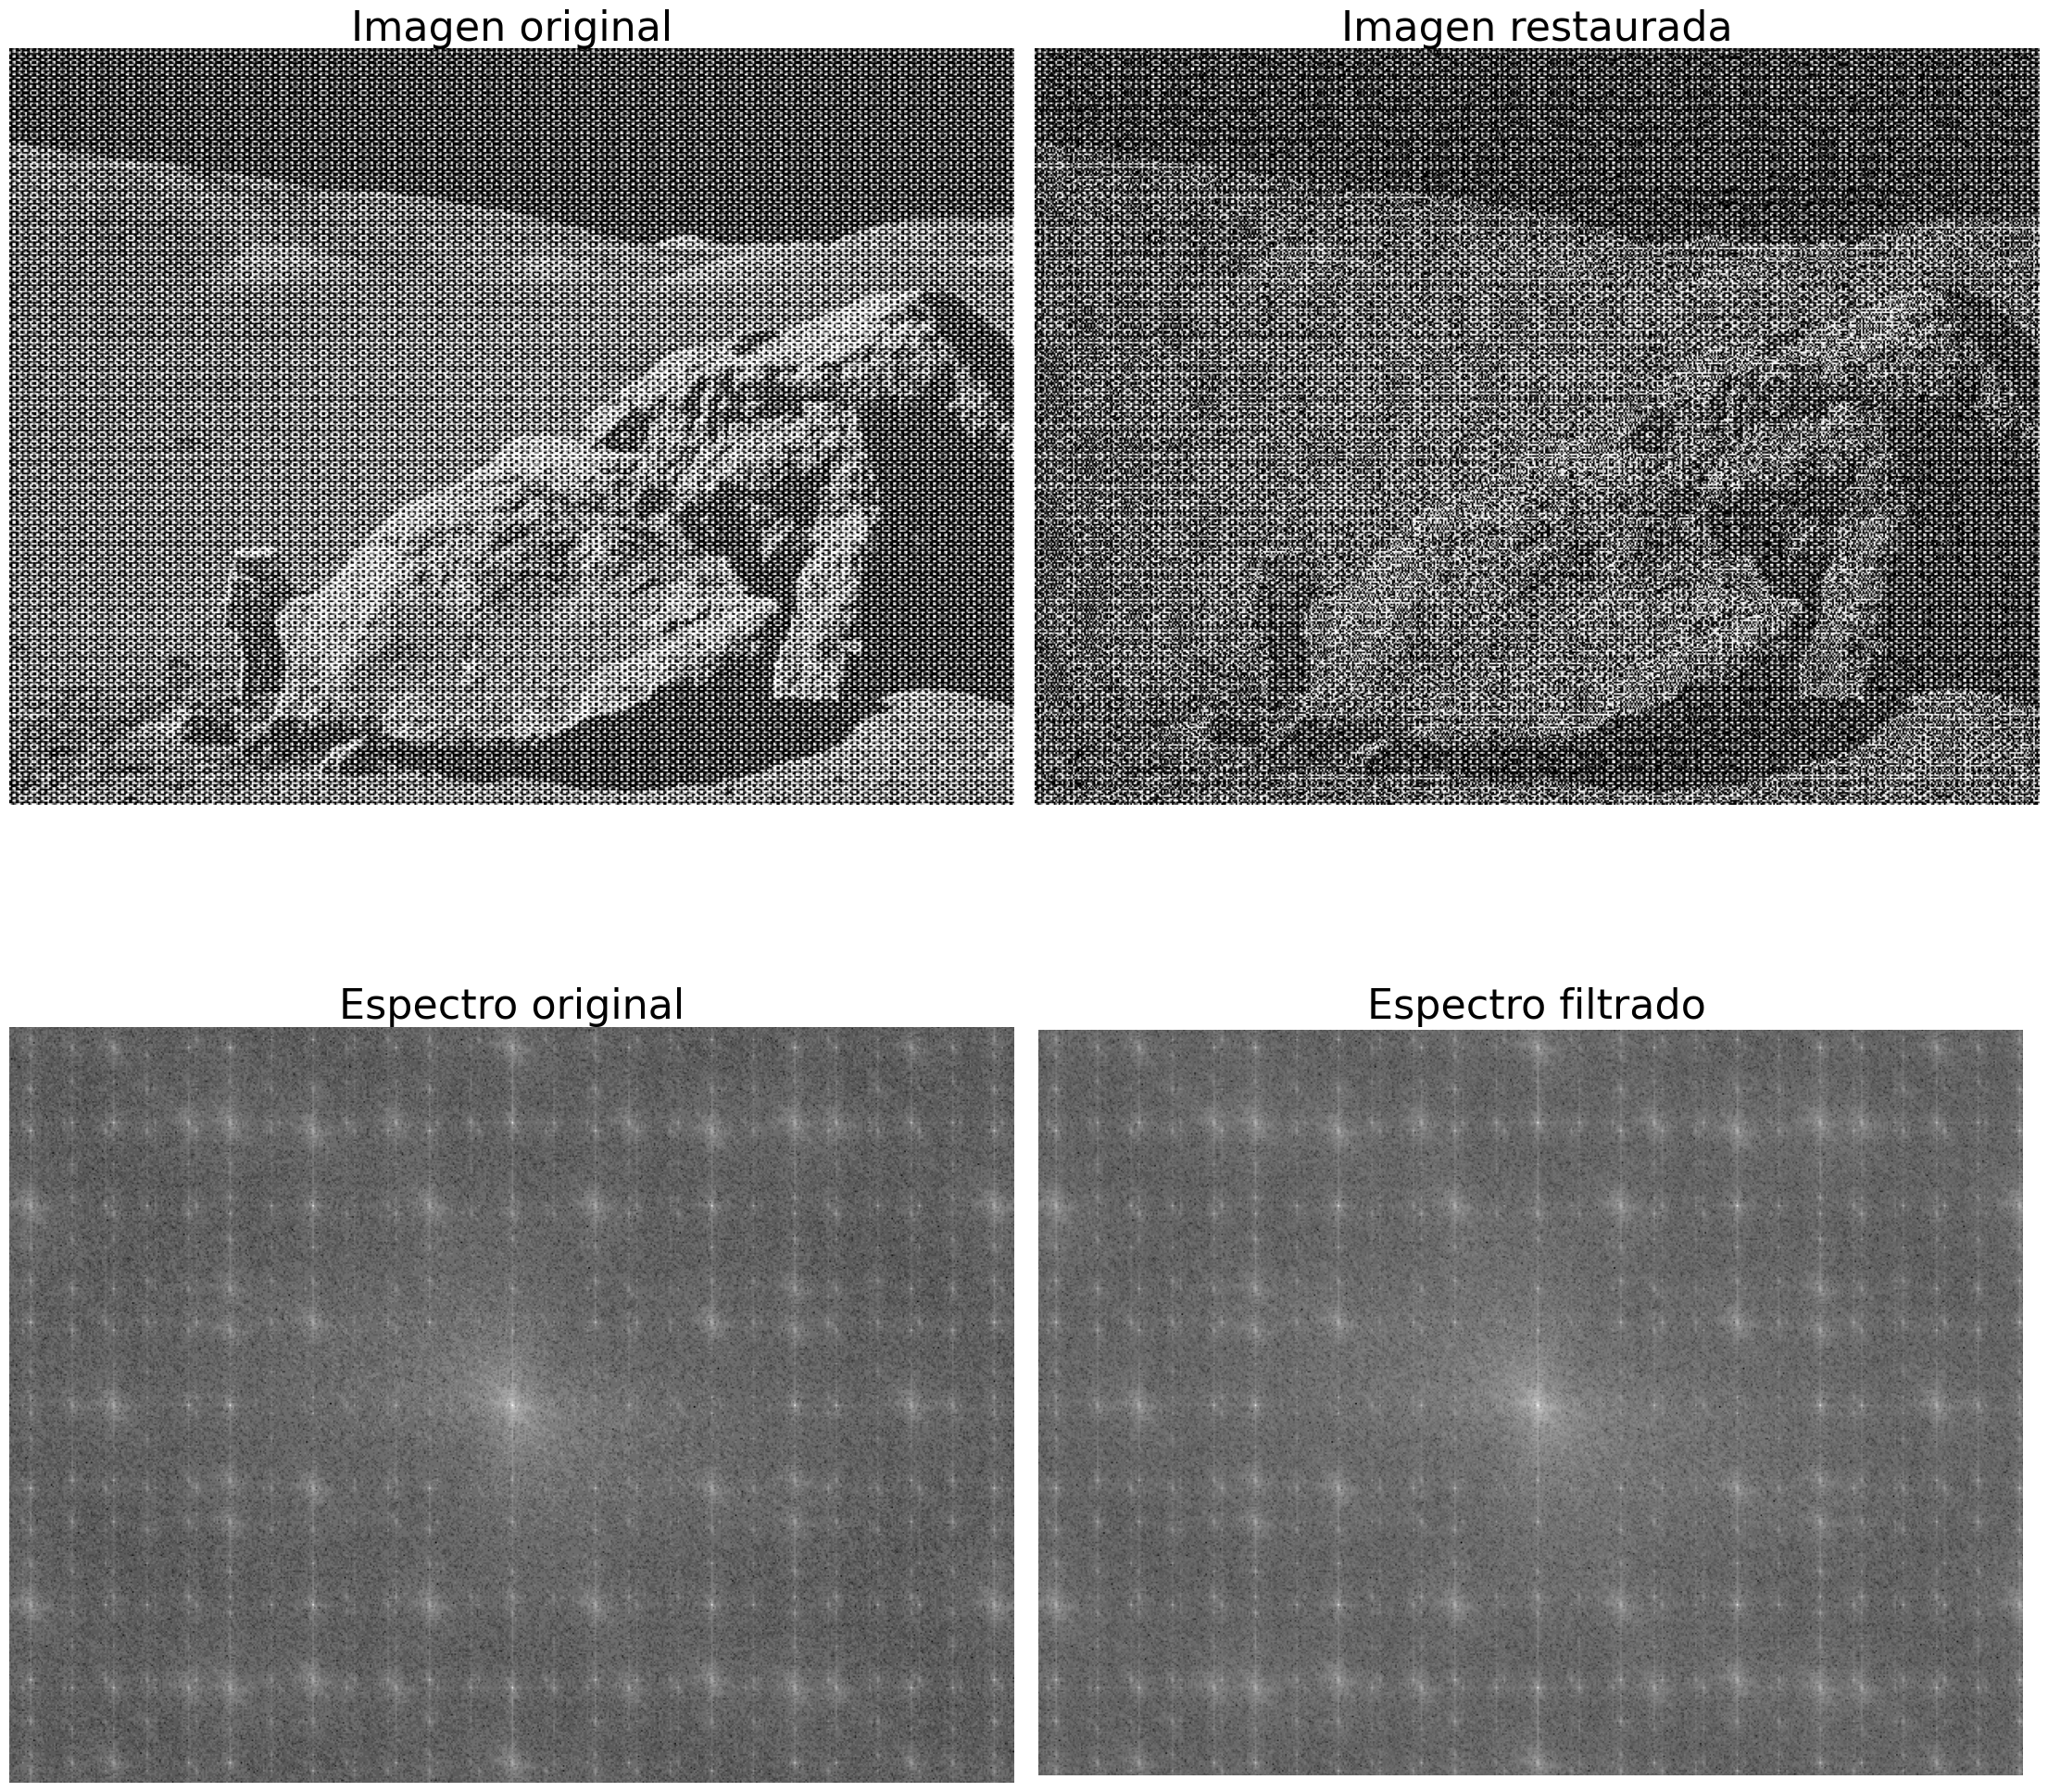

In [20]:
#Extraemos un plano de la imagen (solo si la imagen es de 3 planos)
s = Im.shape         # Obtener tamaño de la matriz de la imagen
#%Creación de máscara/filtro
mask = np.zeros(s) # Máscara del tamaño de la imagen llena de 0´s

#% Este es para UN punto en el espectro (Por ahora la parte central)
mask[2:470,2:620] = 1; #% Se dejan pasar los elementos de interés
#Es básicamente en filtro pasabajas pero si se necesitan detalles, se deben
#eliminar con mucha paciencia cada uno de los puntos observados en el
#espectro

#Obtención de la TF
tfa1 = np.fft.fftshift(np.fft.fft2(Im)) #transf de Fourier e intercambio de cuadrantes
tfa1f = tfa1                            #se va a hacer un cambio destructivo, es mejor guardar el espectro original
spectr = np.uint8(np.log(abs(tfa1)+1))   #para visualizar


#Aplicación del filtro
tfa1f = tfa1f*mask   #Aquí se está aplicando el filtro, es el filtrado de las frecuencias como tal


#Obtención de la imagen restaurada/transformada inversa
imagenrest = np.fft.ifft2(tfa1f)   #Transf inversa: nos devolvemos al espacio directo
b = np.uint8(abs(imagenrest))      #Adecuación de la imagen restaurada para correcta visualización


fig, axes = plt.subplots(2, 2,
                         figsize=(22,21),constrained_layout=True)

# Plot 
im = axes[0,0].imshow(Im, cmap='gray')
axes[0,0].axis('off')
axes[0,0].set_title('Imagen original', fontsize=32)

axes[0,1].imshow(b, cmap='gray')
axes[0,1].axis('off')
axes[0,1].set_title('Imagen restaurada', fontsize=32)

axes[1,0].imshow(spectr, cmap='gray')
axes[1,0].axis('off')
axes[1,0].set_title('Espectro original', fontsize=32)

axes[1,1].imshow(np.log(abs(tfa1f)), cmap='gray')
axes[1,1].axis('off')
axes[1,1].set_title('Espectro filtrado', fontsize=32)
plt.show()
